In [1]:
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from random import randint

## Loading Datasets

In [6]:
X_train = np.loadtxt('input.csv', delimiter=',')

In [20]:
Y_train = np.loadtxt('labels.csv', delimiter=',')

In [21]:
X_test = np.loadtxt('input_test.csv', delimiter=',')

In [26]:
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0


In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt

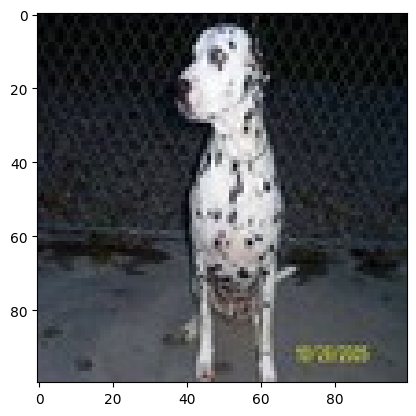

In [42]:
plt.imshow(X_train[randint(0,2000)])
plt.show()

# Model

In [48]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

C:\Users\birat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# model = Sequential()

# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
model.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9826 - loss: 0.0775
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.9800 - loss: 0.0707
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9934 - loss: 0.0432
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9985 - loss: 0.0279
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9987 - loss: 0.0246


In [57]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6407 - loss: 1.5453


[1.254226803779602, 0.6949999928474426]

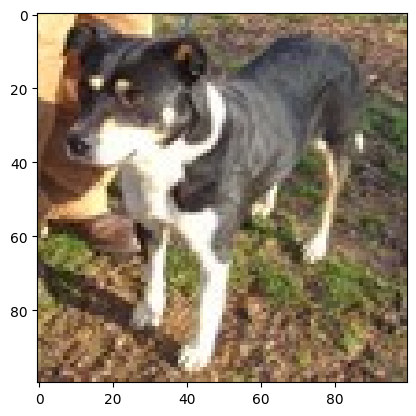

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[9.543048e-05]]
dog


In [82]:
idx = randint(0, len(Y_test))
plt.imshow(X_test[idx, :])
plt.show()

y_pred = model.predict((X_test[idx, :].reshape(1, 100, 100, 3)))

print(y_pred)
if y_pred > 0.5:
    print('cat')
else:
    print('dog')